        Distance  Body Battery       Sleep     stress  Temperature  \
count  40.000000     40.000000   40.000000  40.000000     40.00000   
mean    8.868250     56.625000  424.075000  24.625000     16.25250   
std     7.216006     12.943046   39.636416  10.337106      6.38307   
min     1.120000     36.000000  300.000000  12.000000      4.80000   
25%     5.010000     46.750000  400.000000  17.750000     11.67500   
50%     6.670000     53.500000  423.500000  21.000000     16.35000   
75%    10.010000     64.250000  445.500000  30.500000     21.02500   
max    42.770000     84.000000  509.000000  52.000000     28.10000   

       Total Ascent  Total Descent     Avg Pace  
count     40.000000      40.000000    40.000000  
mean      53.075000      52.200000   386.900000  
std       55.001346      61.719049   157.284945  
min        0.000000       0.000000   283.000000  
25%        5.750000       2.000000   319.000000  
50%       36.000000      22.500000   340.000000  
75%      106.250000

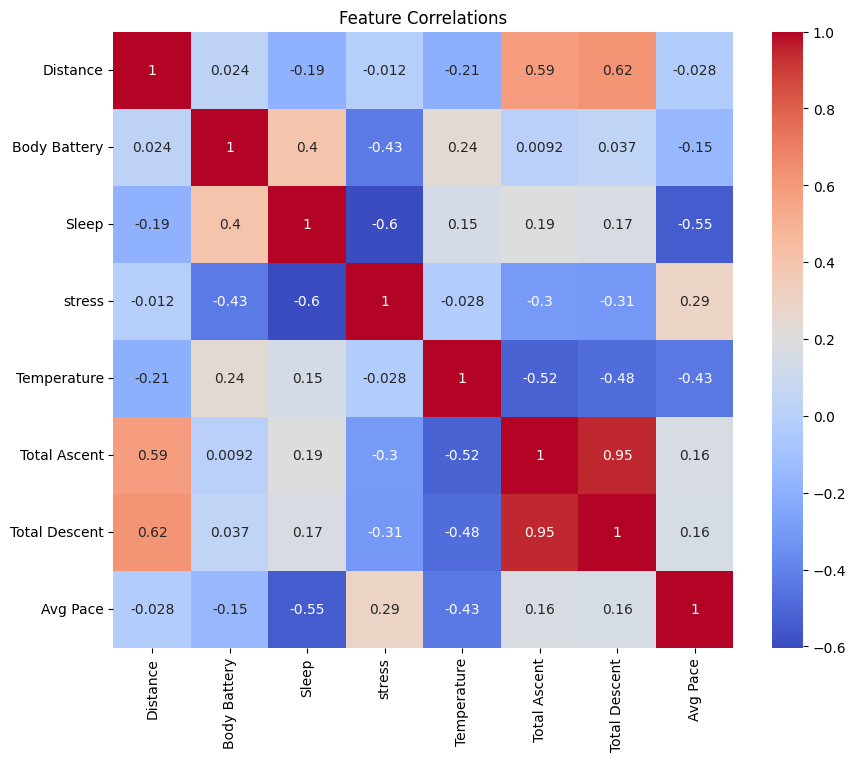

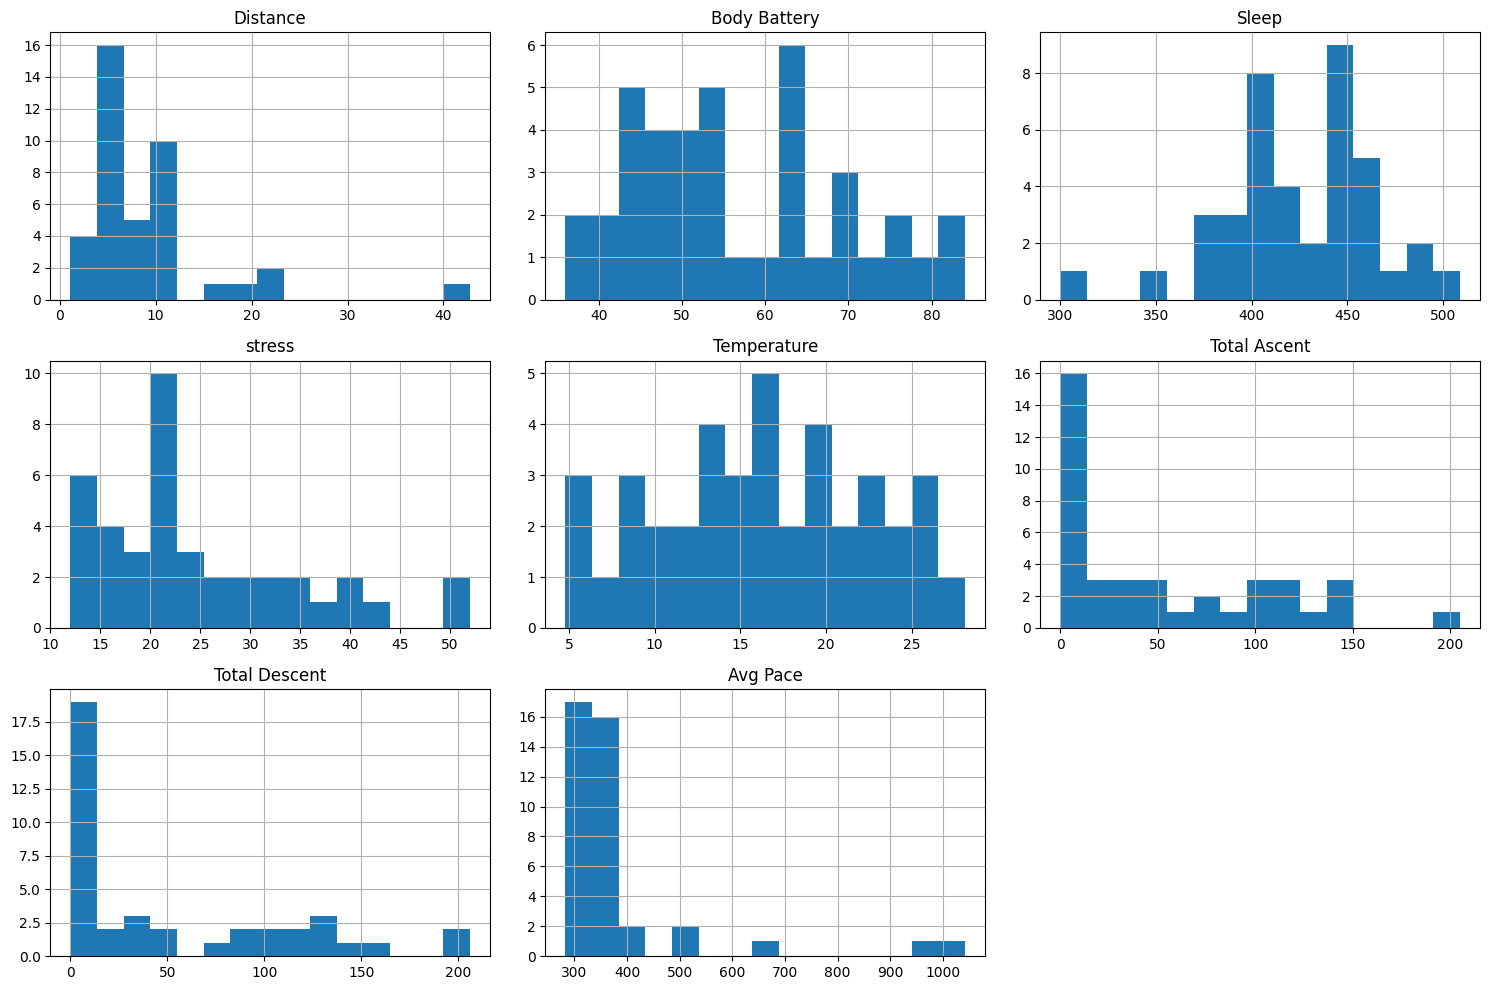

   Distance  Body Battery  Sleep  stress  Temperature  Total Ascent  \
0      5.00            52    400      43         25.5            37   
1      5.01            62    430      20         26.3            22   
2      5.00            77    441      13         22.7            40   
3      5.01            84    486      14         18.1            49   
4      5.00            78    457      15         11.6            52   

   Total Descent  Avg Pace  
0             32       319  
1             20       319  
2             38       343  
3             48       337  
4             49       359  
Epoch 50, Loss: 143137.3125
Epoch 100, Loss: 20429.2129
Epoch 150, Loss: 8914.8164
Epoch 200, Loss: 6275.1094
Epoch 250, Loss: 5153.2539
Epoch 300, Loss: 4401.4609
Epoch 350, Loss: 3821.3015
Epoch 400, Loss: 3328.7686
Epoch 450, Loss: 2900.9966
Epoch 500, Loss: 2533.4788
Epoch 550, Loss: 2213.6960
Epoch 600, Loss: 1933.9154
Epoch 650, Loss: 1648.6914
Epoch 700, Loss: 1382.3319
Epoch 750, Loss: 11

In [6]:
from preprocessing import load_and_preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import joblib


X_train, X_test, y_train, y_test = load_and_preprocess(
    "../../data/Activities-6-2-2.csv"
)
model, mse, r2 = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)
print("R2:", r2)

In [7]:
# Make sure model is in eval mode
model.eval()

# Prepare new input
X_new = np.array([[5, 50, 420, 30, 18.0, 35, 30]])
scaler = joblib.load("scaler.save")
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy().flatten()

print("Predicted:", y_pred)

Predicted: [287.08936]
